In [1]:
#import required libraries
import pandas as pd
from sklearn import datasets
from sklearn.cluster import KMeans
import numpy as np
# for standarization of numeric column in data frame
from scipy.stats import zscore
from sklearn.metrics import silhouette_score
# for visualization
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline

In [2]:
#reading the file 
#Source of data : https://mitpress.mit.edu/books/fundamentals-machine-learning-predictive-data-analytics (Links to an external site.)
df = pd.read_csv("D:/check/Nov/Mobile/ACMETelephoneABT.csv")

In [3]:
# do a eye viw of imported data
df.head(5)

,customer,age,occupation,regionType,marriageStatus,children,income,numHandsets,handsetAge,smartPhone,...,avgInCalls,peakOffPeakRatio,peakOffPeakRatioChangePct,avgDroppedCalls,lifeTime,lastMonthCustomerCareCalls,numRetentionCalls,numRetentionOffersAccepted,newFrequentNumbers,churn
0,1000004,26,crafts,town,yes,true,6,1,1812,false,...,0.00,0.362398,-6.330770,0.00,60,0.00,0,0,0,false
1,1000012,36,,,yes,true,9,4,544,true,...,1.67,5.586826,7.499560,0.00,53,0.00,0,0,0,false
2,1000034,74,professional,town,yes,false,7,2,138,true,...,0.33,0.500000,-5.940493,4.33,58,0.00,0,0,3,false
3,1000063,30,,suburban,no,false,6,3,122,true,...,4.67,8.629661,-0.066485,5.33,50,0.33,0,0,0,false
4,1000085,32,,town,yes,false,7,8,10,true,...,23.00,14.042685,-7.208502,14.67,56,0.00,0,0,0,false


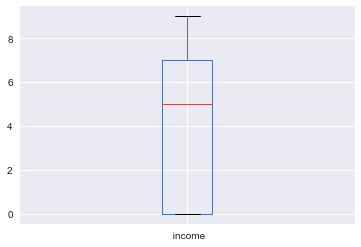

In [4]:
# Income column seems wired,lets see its distributon
df.boxplot(" income")
# yes,we can drop it

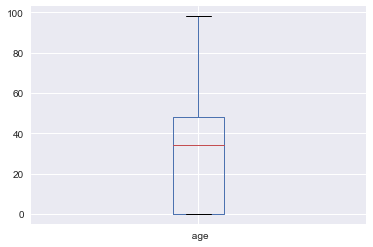

In [5]:
# Age column also needs to be checked,lets see its distributon
df.boxplot(" age")
#Looks fine

In [6]:
# Dimension of data set
df.shape

(10000, 33)

In [7]:
# drop columns which are not numerical and are not required for statistical calculations.
df2=df
df2.drop(df2.columns[[0,2,3,4,5,6]], axis=1, inplace=True)
#Customer ID,occupation,RegionType,MaritialStatus,children,Income does not tell much about behaviour of customer

In [8]:
#lets check the distribution of remaining data
df2.describe().transpose()
# 25% of customer age is 0,which can't be correct.We can impute it but data is not big,so lets drop this as well

,count,mean,std,min,25%,50%,75%,max
age,10000.0,30.318400,22.158676,0.000000,0.000000,34.000000,48.000000,98.000000
numHandsets,10000.0,1.804500,1.345088,1.000000,1.000000,1.000000,2.000000,21.000000
handsetAge,10000.0,390.171700,257.076656,-5.000000,210.000000,339.000000,525.000000,1812.000000
currentHandsetPrice,10000.0,35.730696,57.072922,0.000000,0.000000,0.000000,59.990000,499.990000
avgBill,10000.0,58.927600,43.889815,0.000000,33.327500,49.205000,71.762500,584.230000
avgMins,10000.0,521.170645,540.435285,0.000000,150.627500,359.625000,709.187500,6336.250000
avgrecurringCharge,10000.0,46.236537,23.964960,0.000000,30.000000,44.990000,59.990000,337.980000
avgOverBundleMins,10000.0,42.392670,106.374374,0.000000,0.000000,3.000000,43.750000,4320.750000
avgRoamCalls,10000.0,1.186048,6.048811,0.000000,0.000000,0.000000,0.260000,177.990000
callMinutesChangePct,10000.0,-0.280848,5.231031,-50.355000,-1.725000,-0.100000,1.300000,50.425000


In [9]:
df2.head(2)

,age,numHandsets,handsetAge,smartPhone,currentHandsetPrice,creditRating,homeOwner,creditCard,avgBill,avgMins,...,avgInCalls,peakOffPeakRatio,peakOffPeakRatioChangePct,avgDroppedCalls,lifeTime,lastMonthCustomerCareCalls,numRetentionCalls,numRetentionOffersAccepted,newFrequentNumbers,churn
0,26,1,1812,false,0.00,C,true,true,38.0,7.50,...,0.00,0.362398,-6.33077,0.0,60,0.0,0,0,0,false
1,36,4,544,true,79.99,A,false,true,35.3,24.25,...,1.67,5.586826,7.49956,0.0,53,0.0,0,0,0,false


In [10]:
df2.drop(df2.columns[[0,5,6,7]], axis=1, inplace=True)

In [11]:
# distribution the data set
df2.describe()

,numHandsets,handsetAge,currentHandsetPrice,avgBill,avgMins,avgrecurringCharge,avgOverBundleMins,avgRoamCalls,callMinutesChangePct,billAmountChangePct,...,avgOutCalls,avgInCalls,peakOffPeakRatio,peakOffPeakRatioChangePct,avgDroppedCalls,lifeTime,lastMonthCustomerCareCalls,numRetentionCalls,numRetentionOffersAccepted,newFrequentNumbers
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.804500,390.171700,35.730696,58.927600,521.170645,46.236537,42.392670,1.186048,-0.280848,-0.003595,...,25.208834,8.368029,2.217785,-0.046749,9.992283,18.836300,1.737414,0.044600,0.020700,0.195000
std,1.345088,257.076656,57.072922,43.889815,540.435285,23.964960,106.374374,6.048811,5.231031,0.762955,...,35.665714,17.676847,3.882714,9.973846,14.859162,9.610928,5.754564,0.225867,0.155158,0.641261
min,1.000000,-5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-50.355000,-7.600400,...,0.000000,0.000000,0.000000,-41.322736,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,210.000000,0.000000,33.327500,150.627500,30.000000,0.000000,0.000000,-1.725000,-0.132600,...,3.000000,0.000000,0.779357,-6.791049,1.670000,11.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,339.000000,0.000000,49.205000,359.625000,44.990000,3.000000,0.000000,-0.100000,-0.005200,...,13.330000,2.000000,1.399874,0.011607,5.330000,17.000000,0.000000,0.000000,0.000000,0.000000
75%,2.000000,525.000000,59.990000,71.762500,709.187500,59.990000,43.750000,0.260000,1.300000,0.042600,...,33.330000,9.000000,2.494232,6.494723,12.670000,24.000000,1.330000,0.000000,0.000000,0.000000
max,21.000000,1812.000000,499.990000,584.230000,6336.250000,337.980000,4320.750000,177.990000,50.425000,17.911400,...,610.330000,304.000000,160.000000,37.779743,304.670000,61.000000,365.670000,4.000000,4.000000,3.000000


In [12]:
#check if any null value is there
df2.isnull().sum()

numHandsets                   0
handsetAge                    0
smartPhone                    0
currentHandsetPrice           0
avgBill                       0
avgMins                       0
avgrecurringCharge            0
avgOverBundleMins             0
avgRoamCalls                  0
callMinutesChangePct          0
billAmountChangePct           0
avgReceivedMins               0
avgOutCalls                   0
avgInCalls                    0
peakOffPeakRatio              0
peakOffPeakRatioChangePct     0
avgDroppedCalls               0
lifeTime                      0
lastMonthCustomerCareCalls    0
numRetentionCalls             0
numRetentionOffersAccepted    0
newFrequentNumbers            0
churn                         0
dtype: int64

In [13]:
#check the data types of dataframe 
df2.dtypes

numHandsets                     int64
handsetAge                      int64
smartPhone                     object
currentHandsetPrice           float64
avgBill                       float64
avgMins                       float64
avgrecurringCharge            float64
avgOverBundleMins             float64
avgRoamCalls                  float64
callMinutesChangePct          float64
billAmountChangePct           float64
avgReceivedMins               float64
avgOutCalls                   float64
avgInCalls                    float64
peakOffPeakRatio              float64
peakOffPeakRatioChangePct     float64
avgDroppedCalls               float64
lifeTime                        int64
lastMonthCustomerCareCalls    float64
numRetentionCalls               int64
numRetentionOffersAccepted      int64
newFrequentNumbers              int64
churn                          object
dtype: object

In [14]:
#get the overview of object data 
df2.describe(include=[np.object])

,smartPhone,churn
count,10000,10000
unique,2,2
top,true,true
freq,9015,5000


### We need to focus on High Value Customer Churn, so lets make hypothesis of who can be high value customer
We can assume,High Value customers as those who frequently change their handsets, buy at least 2 phones in a year and those who buy costly Handsets.

In [15]:
df2["handsetAge"].quantile([0, 0.1,0.7, 0.8, 0.9,0.95,0.99, 1])

0.00      -5.00
0.10      95.00
0.70     471.00
0.80     584.00
0.90     745.00
0.95     888.05
0.99    1154.01
1.00    1812.00
Name: handsetAge, dtype: float64

In [16]:
#handset age can't be negative,so better remove it
df2 = df2[df2["handsetAge"]>0]

In [17]:
#Get relevant percentiles and see distribution of these variables
#df2['numHandsets'].quantile([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
df2['numHandsets'].quantile([0, 0.1,0.7, 0.8, 0.9,0.95,0.99, 1])

0.00     1.0
0.10     1.0
0.70     2.0
0.80     2.0
0.90     3.0
0.95     4.0
0.99     7.0
1.00    21.0
Name: numHandsets, dtype: float64

In [18]:
df2.shape

(9986, 23)

In [19]:
#lets crub the outlier present in no of handset to get clear cluster results. M dropping the records but you all can try imputing as well
df3 = df2[df2["numHandsets"]<=7]

In [20]:
df3.shape

(9906, 23)

In [21]:
df3['numHandsets'].quantile([0, 0.1,0.7, 0.8, 0.9,0.95,0.99, 1])

0.00    1.0
0.10    1.0
0.70    2.0
0.80    2.0
0.90    3.0
0.95    4.0
0.99    6.0
1.00    7.0
Name: numHandsets, dtype: float64

In [22]:
df3['currentHandsetPrice'].quantile([0, 0.1,0.7, 0.8, 0.9,0.95,0.99, 1])

0.00      0.00
0.10      0.00
0.70     29.99
0.80     79.99
0.90    149.99
0.95    149.99
0.99    199.99
1.00    499.99
Name: currentHandsetPrice, dtype: float64

In [23]:
#minimum handset price can't be 0,lets impute this
df3.ix[np.abs(df3.currentHandsetPrice)==0,"currentHandsetPrice"] = np.round(df3.currentHandsetPrice.mean()+2*df3.currentHandsetPrice.std())

C:\Users\vikash.chandra\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  
C:\Users\vikash.chandra\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [24]:
df3['currentHandsetPrice'].quantile([0, 0.1,0.2,0.3,0.4,0.5, 0.8, 0.9,0.95,0.99, 1])

0.00      9.99
0.10     29.99
0.20     59.99
0.30    129.99
0.40    148.00
0.50    148.00
0.80    148.00
0.90    149.99
0.95    149.99
0.99    199.99
1.00    499.99
Name: currentHandsetPrice, dtype: float64

In [25]:
#Store all numerical columns
numericalcolumn = df3.select_dtypes(include = [np.number]).columns

In [26]:
#standarize the data
df_z = df3[numericalcolumn].apply(zscore)

In [27]:
#Lets check the data
df_z.head(5)

,numHandsets,handsetAge,currentHandsetPrice,avgBill,avgMins,avgrecurringCharge,avgOverBundleMins,avgRoamCalls,callMinutesChangePct,billAmountChangePct,...,avgOutCalls,avgInCalls,peakOffPeakRatio,peakOffPeakRatioChangePct,avgDroppedCalls,lifeTime,lastMonthCustomerCareCalls,numRetentionCalls,numRetentionOffersAccepted,newFrequentNumbers
0,-0.665080,5.529805,0.548930,-0.479543,-0.963448,-0.338408,-0.437737,-0.195161,0.043969,0.002195,...,-0.700082,-0.478346,-0.476342,-0.630021,-0.674053,4.353739,-0.299246,-0.194908,-0.130384,-0.304092
1,2.043547,0.589678,-0.790175,-0.543258,-0.931509,-0.466937,-0.437737,-0.195161,0.126668,-0.006038,...,-0.594949,-0.379947,0.865360,0.756386,-0.674053,3.615768,-0.299246,-0.194908,-0.130384,-0.304092
2,0.237796,-0.992098,-1.774665,-0.877174,-0.890989,-1.232579,-0.288787,-0.195161,-0.010515,-0.108287,...,-0.709536,-0.458901,-0.441004,-0.590898,-0.377370,4.142890,-0.299246,-0.194908,-0.130384,4.375866
3,1.140671,-1.054434,-2.168462,0.775414,-0.343257,1.236288,-0.437737,-0.195161,-0.069863,-0.141751,...,-0.451715,-0.203183,1.646799,-0.002065,-0.308853,3.299496,-0.241700,-0.194908,-0.130384,-0.304092
5,2.043547,-0.902490,-2.168462,0.319495,0.047163,1.236288,-0.437737,-0.195161,0.277471,-0.014005,...,0.187966,-0.065896,0.816524,-1.708911,-0.034781,3.721193,-0.299246,-0.194908,-0.130384,-0.304092


In [28]:
#Heat map for correlation just to know the  quantified relation between the variable
#calculate the correlation matrix
corr = df_z.corr()
cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)


#draw the correlation table 
def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())
# Seems ok to go with

,numHandsets,handsetAge,currentHandsetPrice,avgBill,avgMins,avgrecurringCharge,avgOverBundleMins,avgRoamCalls,callMinutesChangePct,billAmountChangePct,avgReceivedMins,avgOutCalls,avgInCalls,peakOffPeakRatio,peakOffPeakRatioChangePct,avgDroppedCalls,lifeTime,lastMonthCustomerCareCalls,numRetentionCalls,numRetentionOffersAccepted,newFrequentNumbers
numHandsets,1,-0.38,-0.44,0.23,0.27,0.21,0.14,0.016,-0.0018,0.0054,0.25,0.24,0.23,0.0084,-0.0074,0.19,0.34,0.092,0.1,0.071,0.024
handsetAge,-0.38,1,0.14,-0.24,-0.32,-0.26,-0.14,-0.037,-0.011,-0.014,-0.25,-0.24,-0.2,0.11,-0.0035,-0.23,0.51,-0.14,-0.024,-0.025,-0.011
currentHandsetPrice,-0.44,0.14,1,-0.044,-0.037,-0.017,-0.023,0.00033,-0.0095,-0.0031,-0.039,-0.027,-0.012,-0.045,1.9e-05,-0.039,-0.39,-0.012,-0.042,-0.033,-0.024
avgBill,0.23,-0.24,-0.044,1,0.71,0.63,0.81,0.25,-0.0098,0.032,0.62,0.5,0.4,-0.0025,-0.0049,0.42,-0.042,0.14,0.014,0.0049,-0.00091
avgMins,0.27,-0.32,-0.037,0.71,1,0.57,0.58,0.12,-0.043,-0.0084,0.83,0.7,0.59,-0.089,0.0055,0.57,-0.11,0.31,0.0056,0.0023,0.0045
avgrecurringCharge,0.21,-0.26,-0.017,0.63,0.57,1,0.2,0.068,-0.024,-0.012,0.46,0.4,0.31,0.01,-0.0091,0.32,-0.088,0.12,-0.027,-0.014,-0.00065
avgOverBundleMins,0.14,-0.14,-0.023,0.81,0.58,0.2,1,0.092,0.0025,0.028,0.54,0.42,0.34,-0.017,0.0055,0.34,-0.021,0.099,0.016,0.0049,0.0028
avgRoamCalls,0.016,-0.037,0.00033,0.25,0.12,0.068,0.092,1,-0.012,-0.008,0.052,0.048,0.019,-0.0054,-0.0014,0.093,-0.027,0.012,0.0032,-0.0049,0.0057
callMinutesChangePct,-0.0018,-0.011,-0.0095,-0.0098,-0.043,-0.024,0.0025,-0.012,1,0.62,-0.1,-0.055,-0.058,-0.0023,-0.0091,-0.082,0.0052,-0.033,-0.031,-0.01,0.026
billAmountChangePct,0.0054,-0.014,-0.0031,0.032,-0.0084,-0.012,0.028,-0.008,0.62,1,-0.046,-0.013,-0.014,-0.0091,-0.0038,-0.031,-0.0078,-0.03,-0.015,-0.003,0.0036


### Apply KMeans for different number of clusters to identify the suitable size

In [29]:
cluster_range = range(1,15)
cluster_errors = []
for non_clusters in cluster_range:
    clusters = KMeans(non_clusters, n_init = 5)
    clusters.fit(df_z)
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    cluster_errors.append(clusters.inertia_)

clusters_df = pd.DataFrame({"num_clusters": cluster_range, "cluster_errors": cluster_errors})
clusters_df[0:15]

,cluster_errors,num_clusters
0,208026.000000,1
1,177636.611951,2
2,165442.140016,3
3,154379.448551,4
4,146056.352123,5
5,137817.374286,6
6,132325.456093,7
7,126343.979594,8
8,123186.058665,9
9,118931.104922,10


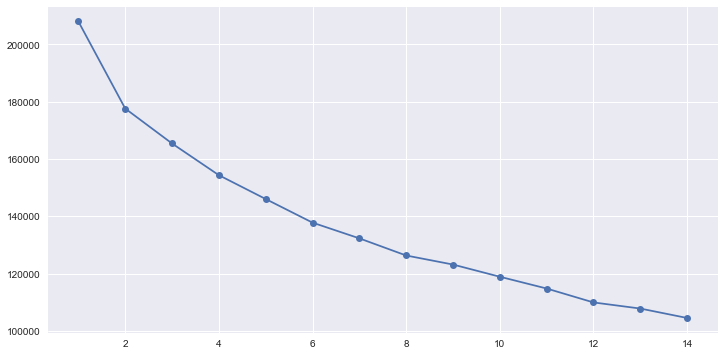

In [30]:
import matplotlib.pyplot as plt
from matplotlib import cm
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

###Lets build KMeans clustering for No.Of Clusters = 5

In [31]:
kmeans = KMeans(n_clusters=5, n_init = 5, random_state=55555)

In [32]:
kmeans.fit(df_z)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=5, n_jobs=1, precompute_distances='auto',
    random_state=55555, tol=0.0001, verbose=0)

In [33]:
predictions = kmeans.predict(df_z)
df3["group"] = predictions
df3.head(5)

C:\Users\vikash.chandra\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,numHandsets,handsetAge,smartPhone,currentHandsetPrice,avgBill,avgMins,avgrecurringCharge,avgOverBundleMins,avgRoamCalls,callMinutesChangePct,...,peakOffPeakRatio,peakOffPeakRatioChangePct,avgDroppedCalls,lifeTime,lastMonthCustomerCareCalls,numRetentionCalls,numRetentionOffersAccepted,newFrequentNumbers,churn,group
0,1,1812,false,148.00,38.00,7.50,38.00,0.0,0.0,-0.030,...,0.362398,-6.330770,0.00,60,0.00,0,0,0,false,3
1,4,544,true,79.99,35.30,24.25,34.98,0.0,0.0,0.395,...,5.586826,7.499560,0.00,53,0.00,0,0,0,false,2
2,2,138,true,29.99,21.15,45.50,16.99,14.0,0.0,-0.310,...,0.500000,-5.940493,4.33,58,0.00,0,0,3,false,2
3,3,122,true,9.99,91.18,332.75,75.00,0.0,0.0,-0.615,...,8.629661,-0.066485,5.33,50,0.33,0,0,0,false,2
5,4,161,true,9.99,71.86,537.50,75.00,0.0,0.0,1.170,...,5.396667,-17.093421,9.33,54,0.00,0,0,0,false,2


In [34]:
#Lets do profiling for high value cumtomers
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly import tools
import plotly.plotly as py
import plotly.graph_objs as go
init_notebook_mode(connected=True) #Plotly offline
from plotly.graph_objs import *

trace0 =  go.Box(
    y=df3.loc[df3["group"]==0,"numHandsets"]
)
trace1 =  go.Box(
    y=df3.loc[df3["group"]==1,"numHandsets"]
)
trace2 =  go.Box(
    y=df3.loc[df3["group"]==2,"numHandsets"]
)
trace3 =  go.Box(
    y=df3.loc[df3["group"]==3,"numHandsets"]
)
trace4 =  go.Box(
    y=df3.loc[df3["group"]==4,"numHandsets"]
)

data = [trace0,trace1,trace2,trace3,trace4]
fig = tools.make_subplots(rows=1, cols=5)

fig.append_trace(trace0,1,1)
fig.append_trace(trace1,1,2)
fig.append_trace(trace2,1,3)
fig.append_trace(trace3,1,4)
fig.append_trace(trace4,1,5)


fig['layout'].update(height=600, width=900, title='numHandsets')
iplot(fig)

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]  [ (1,3) x3,y3 ]  [ (1,4) x4,y4 ]  [ (1,5) x5,y5 ]



In [35]:
trace0 =  go.Box(
    y=df3.loc[df3["group"]==0,"handsetAge"]
)
trace1 =  go.Box(
    y=df3.loc[df3["group"]==1,"handsetAge"]
)
trace2 =  go.Box(
    y=df3.loc[df3["group"]==2,"handsetAge"]
)
trace3 =  go.Box(
    y=df3.loc[df3["group"]==3,"handsetAge"]
)
trace4 =  go.Box(
    y=df3.loc[df3["group"]==4,"handsetAge"]
)

data = [trace0,trace1,trace2,trace3,trace4]
fig = tools.make_subplots(rows=1, cols=5)

fig.append_trace(trace0,1,1)
fig.append_trace(trace1,1,2)
fig.append_trace(trace2,1,3)
fig.append_trace(trace3,1,4)
fig.append_trace(trace4,1,5)


fig['layout'].update(height=600, width=900, title='handsetAge')
iplot(fig)

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]  [ (1,3) x3,y3 ]  [ (1,4) x4,y4 ]  [ (1,5) x5,y5 ]



In [36]:
trace0 =  go.Box(
    y=df3.loc[df3["group"]==0,"currentHandsetPrice"]
)
trace1 =  go.Box(
    y=df3.loc[df3["group"]==1,"currentHandsetPrice"]
)
trace2 =  go.Box(
    y=df3.loc[df3["group"]==2,"currentHandsetPrice"]
)
trace3 =  go.Box(
    y=df3.loc[df3["group"]==3,"currentHandsetPrice"]
)
trace4 =  go.Box(
    y=df3.loc[df3["group"]==4,"currentHandsetPrice"]
)

data = [trace0,trace1,trace2,trace3,trace4]
fig = tools.make_subplots(rows=1, cols=5)

fig.append_trace(trace0,1,1)
fig.append_trace(trace1,1,2)
fig.append_trace(trace2,1,3)
fig.append_trace(trace3,1,4)
fig.append_trace(trace4,1,5)


fig['layout'].update(height=600, width=900, title='currentHandsetPrice')
iplot(fig)
# Do this for every variables

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]  [ (1,3) x3,y3 ]  [ (1,4) x4,y4 ]  [ (1,5) x5,y5 ]



In [37]:
df_highvalue = df3[df3["group"]==4]

In [38]:
df_highvalue.groupby("churn").agg({'churn': 'count'})

,churn
churn,
false,174
true,123


### Like this try to come with a frame work to decide on the high value cumtomer
As example,From the above analysis, we can infer that following are the target group of customers: 
1. Customers who purchase at least 2 handsets per year,the average is 3.
2. Customers whose income is relatively less since they are mostly students and youngsters.
3. Customers who purchase costly hand sets.

Try to infer about the each group spending & usage pattern. Most members of this group are already churned,so better making strategy for this type of group will make sense